In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32,"

In [5]:
%%capture --no-display
import sys
pred_path = '/home/yossi/yossi_local/predictive_coding_python'
if pred_path not in sys.path:
    sys.path.append(pred_path)
import importlib
from imp import reload
import data_handling as dat
import predictive_network_subclasses as pn
import numpy as np
import matplotlib.pyplot as plt
import os
import auditory_analysis as aan
import visualisation as vis
import pickle as pkl
from imp import reload
# import results_dataframe_handling as rdh
import pd_dataframe_handling as rdh

import interactive_plotting as iplot
import pandas as pd
reload(iplot)
reload(aan)
reload(vis)
reload(pn)
reload(rdh)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

In [6]:
reload(aan)

<module 'auditory_analysis' from '/home/yossi/yossi_local/predictive_coding_python/auditory_analysis.py'>

In [51]:
reload(aan)
# res_folder_path = '/home/yossi/Dropbox/visualRFNN/Auditory/Datasets/Dataset_2_mixed_morrisson_speech_allsounds_powerspect_with_hill/nnResults/a_0_b_1_norm_0/theano/broad_hyperparameter_grid_search/new_longer_wider/'
res_folder_path = '/home/yossi/Dropbox/visualRFNN/Auditory/Datasets/Dataset_2_mixed_morrisson_speech_allsounds_powerspect_with_hill/nnResults/a_0_b_1_norm_0/shuffled_minibatches/broad_search/'
res_path = res_folder_path + 'res_pd.pkl'
if not os.path.exists(os.path.dirname(os.path.abspath(res_path))):
    aan.postprocess_res_folder(res_folder_path, res_path)
res_pd = pd.read_pickle(res_path)
res_pd = res_pd.query('log_reg_factor == -6 or log_reg_factor == -5.5 or log_reg_factor == -5 or log_reg_factor == -4.5 or log_reg_factor == -4 or log_reg_factor == -3.5 or log_reg_factor == -3 or log_reg_factor == -2.5 or log_reg_factor == -2 or log_reg_factor == -1.5 or log_reg_factor == -1')
# noiseless_res_pd = res_pd.query('noise_ratio==0').sort_values('final_val_cost')
# res_pd = res_pd.query('noise_ratio==0.5').sort_values('final_val_cost')

In [52]:
dat.pickle_data(res_pd, res_folder_path + 'main_auditory_results_pd.pkl')

In [8]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [29]:
reload(iplot)

<module 'interactive_plotting' from '/home/yossi/yossi_local/predictive_coding_python/interactive_plotting.py'>

In [45]:
this_save_dir = 'auditory_images_with_noise/'
root_dir='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/'
with_noise_url_pd = iplot.get_urls_for_auditory_df_data(res_pd.loc[res_pd['nonlinearity']=='sigmoid'], 'log_reg_factor', 'num_hidden_units', 'final_val_cost', server_address='', root_dir=root_dir, this_save_dir=this_save_dir, verbose=False)

In [ ]:
('noise_ratio==0.5 and num_hidden_units>10').query('log_reg_factor == -6 or 
log_reg_factor == -5.5 
log_reg_factor == -5 or 
log_reg_factor == -4.5 or 
log_reg_factor == -4 or 
log_reg_factor == -3.5 or 
log_reg_factor == -3 or 
log_reg_factor == -2.5 or 
log_reg_factor == -2 or 
log_reg_factor == -1.5 or 
log_reg_factor == -1')

In [39]:
reload(iplot)

<module 'interactive_plotting' from '/home/yossi/yossi_local/predictive_coding_python/interactive_plotting.py'>

In [53]:
aud_res_df

NameError: name 'aud_res_df' is not defined

In [40]:
%%capture --no-display
iplot.plot_linked_heatmap_weights(with_noise_url_pd, x_key='log_reg_factor', y_key='num_hidden_units',add_t_slider=False)#, save_path='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/visual_results_no_noise.html')

In [41]:
this_save_dir = 'auditory_images_no_noise/'
root_dir='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/'
no_noise_url_pd = iplot.get_urls_for_auditory_df_data(noiseless_res_pd, 'log_reg_factor', 'num_hidden_units', 'final_val_cost', server_address='', root_dir=root_dir, this_save_dir=this_save_dir, verbose=False)

In [43]:
%%capture --no-display
iplot.plot_linked_heatmap_weights(no_noise_url_pd, x_key='log_reg_factor', y_key='num_hidden_units',add_t_slider=False)#, save_path='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/visual_results_no_noise.html')

In [47]:
this_save_dir = 'auditory_images_with_noise_scaled_tanh/'
root_dir='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/'
tanh_url_pd = iplot.get_urls_for_auditory_df_data(res_pd.loc[res_pd['nonlinearity']=='scaled_tanh'], 'log_reg_factor', 'num_hidden_units', 'final_val_cost', server_address='', root_dir=root_dir, this_save_dir=this_save_dir, verbose=False)

In [48]:
%%capture --no-display
iplot.plot_linked_heatmap_weights(tanh_url_pd, x_key='log_reg_factor', y_key='num_hidden_units',add_t_slider=False)#, save_path='/home/yossi/yossi_local/github/temporal_prediction_model/Figures/visual_results_no_noise.html')

In [50]:
res_pd.nonlinearity.unique()

array(['sigmoid', 'scaled_tanh', 'linear'], dtype=object)

In [43]:
url_save_dir = 'yossi/auditory_varying_t_future/400_units/'
url_pd = iplot.get_urls_for_auditory_df_data(res_pd.query('num_hidden_units==400 and log_reg_factor==-5.5'), 'log_reg_factor', 't_future', 'final_val_cost', this_save_dir=url_save_dir)

getting weight images...
done


# 400 hidden units

In [44]:
iplot.plot_linked_heatmap_weights(url_pd)

# 1600 hidden units

In [36]:
url_save_dir = 'yossi/auditory_varying_t_future/1600_units/'
url_pd = iplot.get_urls_for_auditory_df_data(res_pd.query('num_hidden_units==1600'), 'log_reg_factor', 't_future', 'final_val_cost', this_save_dir=url_save_dir)

getting weight images...
done


In [37]:
iplot.plot_linked_heatmap_weights(url_pd)

In [38]:
res_path = res_folder_path + 'res_pd.pkl'
# if not os.path.exists(os.path.dirname(os.path.abspath(res_path))):
aan.postprocess_res_folder(res_folder_path, res_path, real_path='/home/yossi/Dropbox/Yossi_Nicol_shared/yossi2L1/')
res_pd = pd.read_pickle(res_path)

['ks_f_bw_neg', 'ks_f_bw_pos', 'ks_t_bw_neg', 'ks_t_bw_pos']


In [ ]:
reload(aan)
fig = plt.figure(figsize=[10,10])
gs = plt.GridSpec(4,3)
ax_0 = fig.add_subplot(gs[:2,:])
ax_1 = fig.add_subplot(gs[2:,:])

reload(aan)
ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Final validation loss']
validation_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('num_hidden_units==400 and log_reg_factor <-3'), 't_future', 'log_reg_factor', 'final_val_cost', ax=ax_0,ax_labels=ax_labels)

ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Mean KS measure']
ks_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('num_hidden_units==400  and log_reg_factor <-3'), 't_future', 'log_reg_factor', 'mean_ks', ax=ax_1,ax_labels=ax_labels)

ax_0.set_xticks([])
ax_0.set_xlabel('')

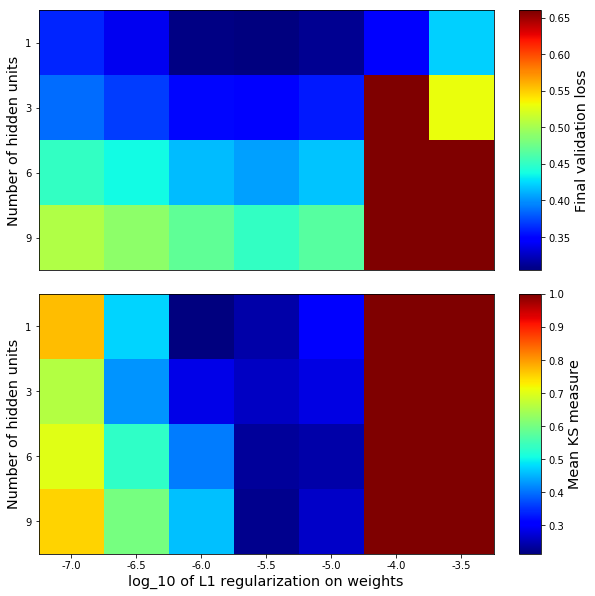

In [40]:
reload(aan)
fig = plt.figure(figsize=[10,10])
gs = plt.GridSpec(4,3)
ax_0 = fig.add_subplot(gs[:2,:])
ax_1 = fig.add_subplot(gs[2:,:])

reload(aan)
ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Final validation loss']
validation_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('num_hidden_units==1600 and log_reg_factor <-3'), 't_future', 'log_reg_factor', 'final_val_cost', ax=ax_0,ax_labels=ax_labels)

ax_labels = [ 'log_10 of L1 regularization on weights', 'Number of hidden units','Mean KS measure']
ks_cost_grid_im = aan.plot_3D_info_grid(res_pd.loc[res_pd['nonlinearity']=='sigmoid'].query('num_hidden_units==1600  and log_reg_factor <-3'), 't_future', 'log_reg_factor', 'mean_ks', ax=ax_1,ax_labels=ax_labels)

ax_0.set_xticks([])
ax_0.set_xlabel('')